Moving Target Calculation

In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Load the autoreload extension
%load_ext autoreload

# Set autoreload mode
%autoreload 2
#%reload_ext autoreload
from util import load_parameters
import ballistics as b
import util as util
import moving_targets as mt

KMH_TO_MPS = 1000 / 3600

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# Define the target parameters
target_speed = 50 / 3.6 # m/s
target_distance = 250 # m
target_angle = 0 # degrees

In [21]:
# Define bullet parameters
params = load_parameters()
barrel_angle = params['barrel_angle']
v0 = params['v0']
drag_coefficient_g1 = params['drag_coefficient']
h = params['h']
bullet_mass = params['bullet_mass']
bullet_area = params['bullet_area']
temp = params['temp']
pressure = params['pressure']
humidity = params['humidity']

air_density = b.calculate_air_density(temp, pressure, humidity)
util.set_air_density(air_density)

Loaded parameters


In [22]:
# Base calculations
time_of_flight = b.calculate_time_of_flight(v0, drag_coefficient_g1, bullet_mass, bullet_area, target_distance, barrel_angle)
hold_mrad = b.calculate_hold_mrad(target_speed, target_distance, target_angle, time_of_flight)
print(f"Hold (mrad) for target with speed {np.round(target_speed*3.6,0)}km/h at {target_distance}m:", np.round(hold_mrad,1))

Hold (mrad) for target with speed 50.0km/h at 250m: 17.6


In [23]:
# Hold table
vts = np.arange(5, 55, 5)

# Create distances at least the number as velocities
distances = np.arange(25, 25 * len(vts) + 1, 25)

time_of_flights = b.calculate_time_of_flights(v0, drag_coefficient_g1, bullet_mass, bullet_area, distances, barrel_angle)

hold_table = b.create_hold_table(vts, distances, time_of_flights, target_angle)

df = mt.plot_hold_table(hold_table, vts, distances)
df
#display(df)

v (km/h),5,10,15,20,25,30,35,40,45,50
d (m),,,,,,,,,,
25,1.5,3.0,4.5,6.0,7.5,9.0,10.4,11.9,13.4,14.9
50,1.5,3.0,4.6,6.1,7.6,9.1,10.6,12.1,13.7,15.2
75,1.5,3.1,4.6,6.2,7.7,9.3,10.8,12.4,13.9,15.4
100,1.6,3.1,4.7,6.3,7.9,9.4,11.0,12.6,14.2,15.7
125,1.6,3.2,4.8,6.4,8.0,9.6,11.2,12.8,14.4,16.0
150,1.6,3.3,4.9,6.5,8.2,9.8,11.4,13.1,14.7,16.3
175,1.7,3.3,5.0,6.7,8.3,10.0,11.7,13.3,15.0,16.7
200,1.7,3.4,5.1,6.8,8.5,10.2,11.9,13.6,15.3,17.0
225,1.7,3.5,5.2,6.9,8.6,10.4,12.1,13.8,15.6,17.3


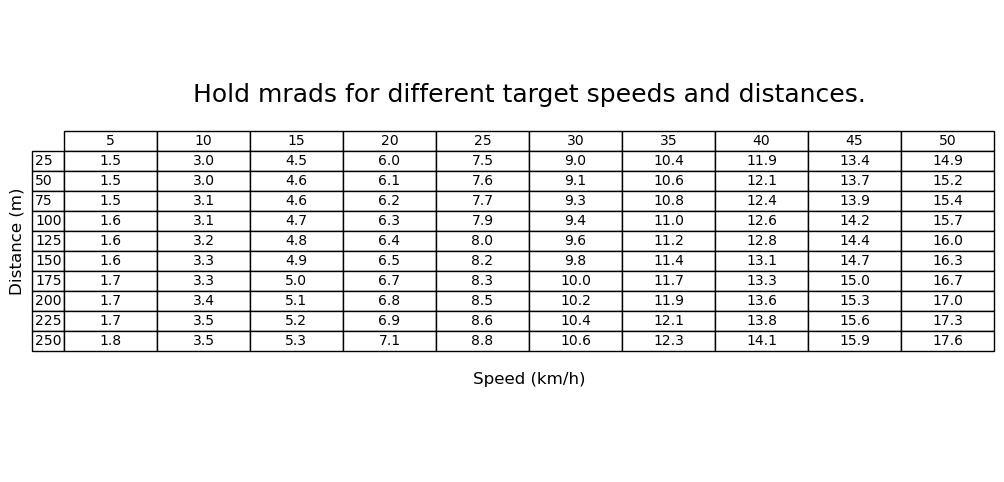

PDF file created successfully.


In [24]:
# Save it
mt.save_hold_table(df)
